# **Image processing: Exploring geometric, logical and morphological operations in images + Color spaces (Part I)**  

**This lab is composed of two parts.**

**You must submit a single lab report covering both Part I and Part II.**

**Part II will be sent before the start of next week's session.**

**The lab report is due by the end of the second lab session.**

In this lab, you will explore essential image processing techniques that transform and enhance images, allowing you to extract meaningful insights. These foundational operations serve as building blocks for more advanced computer vision applications.  

### **What you will learn in this Lab:**  
- You will understand the principles behind **geometric transformations and logical operations** in image processing.  
- You will apply **geometric transformations** such as **resizing, rotation, translation, and perspective modification** to adjust image properties.  
- You will perform **bitwise logical operations** to manipulate and combine images.  
- Learn about **morphological operations** to enhance and extract structural information from images.  
- Explore **color spaces** and how to convert between different color models for advanced image processing.  

---  




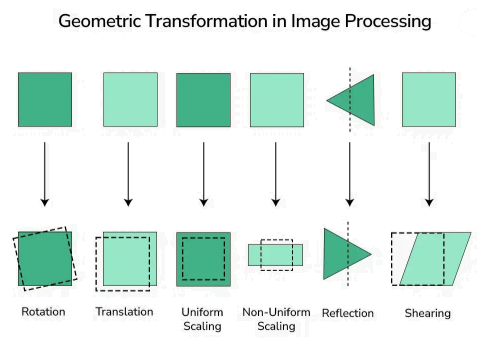
-----

### Understanding the libraries used
Before starting the lab, provide a brief definition of the following libraries and their role in image processing:

- **OpenCV**: Open Source Computer Vision Library, primarily used for image and video processing tasks such as geometric transformations, filtering, and morphological operations.
  
- **NumPy**: A fundamental package for numerical computing in Python, providing support for arrays, matrices, and mathematical functions used in image processing.
  
- **Matplotlib**: A plotting library for Python that enables visualization of images, histograms, and transformations applied to images.

If not installed, you can install them using:

`pip install opencv-python numpy matplotlib`

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

# Manipulation 1: Geometric Transformations  

You will explore **geometric transformations** and their role in image processing, including:  

- **Resizing (Scaling)** – Adjusting the image dimensions while preserving or modifying aspect ratios.  
- **Translation** – Moving an image to a different position without altering its content.  
- **Rotation** – Changing the orientation of an image around a fixed point.  
- **Shearing** – Slanting the image along an axis, distorting its shape.  
- **Perspective Transformation** – Adjusting the image’s perspective to simulate different viewpoints.  



### Why are these transformations important?  

They are widely used in various computer vision tasks, such as:  

- **Image alignment** – Aligning images for analysis and comparison.  
- **Data augmentation** – Creating variations of images for training machine learning models.  
- **Perspective correction** – Fixing distortions in images for better representation and analysis.  

### **Theoretical research:** Provide bellow a description of the following key concepts (using your own words):


* **Geometrical transformations** : transformation that alter the spatial coordinates and orientation of an image without changing its pixel values 

* **Logical operations** : involve pixel-wise manipulations using Boolean algebra where each pixel is processed according to logical operations : **AND, OR, XOR** and **NOT**.

* **Morphological operations** : are image-processing techniques used to analyze and process geometric structures in binary and grayscale images.


## Task 1: Image scaling  

#### **T 1.1: Resizing algorithms**  

Explore and compare different image resizing methods. For each method, provide a description of how it works:  

- **Nearest neighbor** (Simplest method, but may cause pixelation) : each pixel in the new image takes the value of its nearest pixel in the original image. This method is computationally efficient, but it may result in a blocky appearance, especially when scaling up significantly. The duplication of pixels in images may result in some loss of information.   
- **Bilinear interpolation** (Better quality, considers neighboring pixels) :  It calculates the new pixel values by considering the weighted average of the nearest four pixels in the original image. This interpolation method often produces smoother and more visually appealing results, particularly when enlarging images.
- **Bicubic interpolation** (Higher quality, but more computationally expensive) : Bicubic interpolation is a third-order interpolation method that considers 16 surrounding pixels instead of 4. It provides smoother and more visually appealing results than bilinear interpolation by considering how pixel values change not just linearly, but also with respect to second-order derivatives.

---

**Manual implementation of a resizing algorithm:** Write a function that implements the nearest neighbor resizing algorithm manually, without using any built-in functions for resizing. The new size can be provided as absolute values and also as positive/negative ratios.

- Load the `cameraman.png` image. 
- Resize the `cameraman.png` image both up and down using the nearest neighbor method you have implemented. Perform at leat 6 differents resizings.
- Display the original image along with its size.  
- Display the resized images with their new sizes.  

**Hint:** You can achieve this by iterating over the pixel values and mapping them to a new zero matrix (black image) with the desired size based on the chosen interpolation method. It is important to warn the user if the new size of the image does not preserve the aspect ratio (but the resize has to be performed anyway).

**Perform the same work for another resizing method: Bilinear interpolation or Bicubic interpolation.**

**Analyse the obtained images.**


In [22]:
def nearest_neighbor_interpolation(img, scale):
    height, width = img.shape
    new_height = int(height * scale)
    new_width = int(width * scale)
    new_img = np.zeros((new_height, new_width), dtype=np.uint8)
    for i in range(new_height):
        for j in range(new_width):
            x = min(int(i / scale), height - 1)  
            y = min(int(j / scale), width - 1)
            new_img[i, j] = img[x, y]
    return new_img

def bilinear_interpolation(img, scale):
    height, width = img.shape
    new_height = int(height * scale)
    new_width = int(width * scale)
    new_img = np.zeros((new_height, new_width), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            
            x = (i / scale)
            y = (j / scale)
            
            x1 = int(np.floor(x))
            y1 = int(np.floor(y))
            x2 = min(x1 + 1, height - 1)  
            y2 = min(y1 + 1, width - 1)

            # Distances for weighting
            dx = x - x1
            dy = y - y1

            # Bilinear interpolation formula
            I11 = img[x1, y1]
            I12 = img[x1, y2]
            I21 = img[x2, y1]
            I22 = img[x2, y2]

            new_img[i, j] = int(
                (1 - dx) * (1 - dy) * I11 +
                dx * (1 - dy) * I21 +
                (1 - dx) * dy * I12 +
                dx * dy * I22
            )

    return new_img



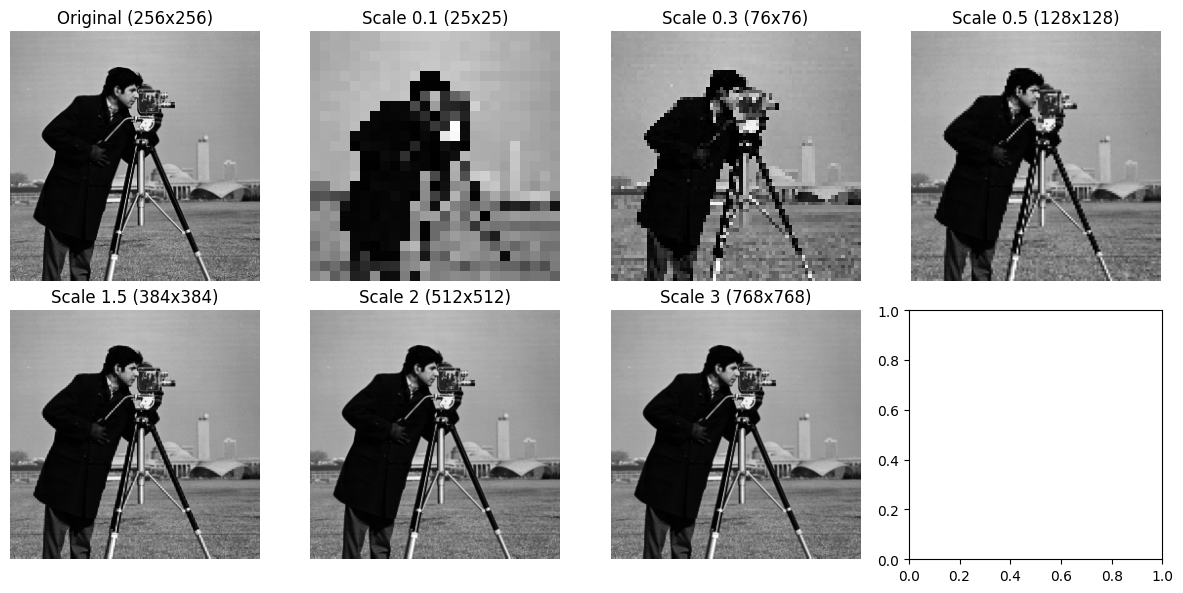

In [23]:
# Your code here.
cameraman_img = cv.imread('Images/cameraman.png', cv.IMREAD_GRAYSCALE)

scales = [0.1, 0.3, 0.5, 1.5, 2, 3]

# Set up the figure
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

# Display original image
axes[0].imshow(cameraman_img, cmap='gray')
axes[0].set_title(f"Original ({cameraman_img.shape[1]}x{cameraman_img.shape[0]})")
axes[0].axis("off")


for idx, scale in enumerate(scales, start=1):
    resized_img = nearest_neighbor_interpolation(cameraman_img, scale)
    h, w = resized_img.shape
    axes[idx].imshow(resized_img, cmap='gray')
    axes[idx].set_title(f"Scale {scale} ({w}x{h})")
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

    






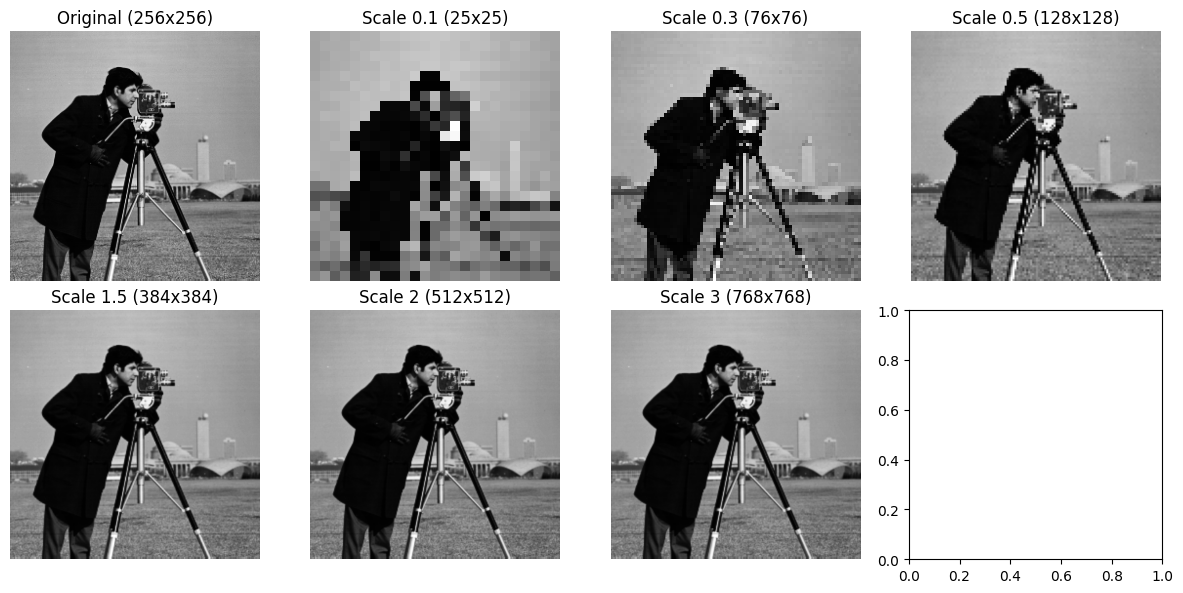

In [24]:
# Your code here.
cameraman_img = cv.imread('Images/cameraman.png', cv.IMREAD_GRAYSCALE)

scales = [0.1, 0.3, 0.5, 1.5, 2, 3]

# Set up the figure
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

# Display original image
axes[0].imshow(cameraman_img, cmap='gray')
axes[0].set_title(f"Original ({cameraman_img.shape[1]}x{cameraman_img.shape[0]})")
axes[0].axis("off")


for idx, scale in enumerate(scales, start=1):
    resized_img = bilinear_interpolation(cameraman_img, scale)
    h, w = resized_img.shape
    axes[idx].imshow(resized_img, cmap='gray')
    axes[idx].set_title(f"Scale {scale} ({w}x{h})")
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

    






## Nearest Neighbor algorithm:
### Downscaling Effects (0.1x, 0.3x, 0.5x)
| Scale Factor | Observations |
|--------------|--------------|
| 0.1x         | Extreme pixelation occurs. Most details are lost as the image shrinks to just 10% of its original size. |
| 0.3x         | The image is still highly pixelated, but some structure remains visible. |
| 0.5x         | A recognizable image is retained, but edges appear blocky due to the nearest-neighbor method. |

### Upscaling Effects (1.5x, 2x, 3x)
| Scale Factor | Observations |
|--------------|--------------|
| 1.5x         | The image looks blocky, with noticeable pixel replication. |
| 2x           | Pixelation becomes more apparent, as each pixel is simply copied into a 2×2 block. |
| 3x           | The "staircase" effect is severe, with sharp edges losing smoothness. |


#### **T 1.2: Image resizing using built-in functions of OpenCV**  

The `resize()` function in OpenCV allows adjusting the size of an image in different ways:  

- Scaling using axis-specific factors:  
   - `fx`: Scale factor along the **horizontal axis**.  
   - `fy`: Scale factor along the **vertical axis**.  

- Interpolation parameter (`interpolation`)  
   - Determines how pixel values are calculated when resizing.  
   - Common interpolation methods:  
     - `cv2.INTER_NEAREST`
     - `cv2.INTER_LINEAR`
     - `cv2.INTER_CUBIC`  

---

Before applying the `resize()` function, youl will first create a simple grayscale test image using `NumPy` and `Matplotlib`. The image will be **6×6 pixels** and structured as follows:  

- The background is black *(pixel value = 0)*.  
- A white square *(pixel value = 255)* fills the inner **4×4** region, starting from **row 1 and column 1**.  
- A smaller black square *(pixel value = 0)* is embedded inside the white square, occupying the **central 2×2** region.  

Once the image (`imgtest`) is created, it should be displayed before applying any resizing operations.  

After generating the test image, the next step is to apply the `resize()` function to modify its dimensions. This involves adjusting the scale factors along the horizontal (`fx`) and vertical (`fy`) axes and experimenting with different interpolation methods.  

To do this, follow these steps:  
1. Use `resize()` to scale `imgtest` by modifying the `fx` and `fy` values.  
2. Apply different interpolation methods (`INTER_NEAREST`, `INTER_LINEAR`, `INTER_CUBIC`) and observe their effects.  
3. Display both the original and resized versions of `imgtest` and analyze the differences.  


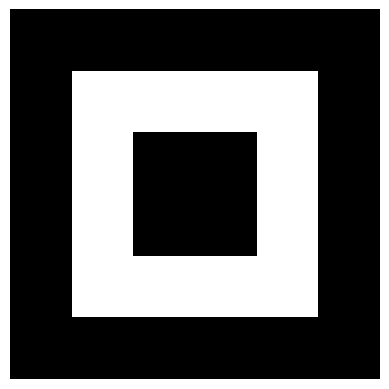

In [38]:
# Create and display the 6×6 grayscale test image, then follow the steps described above.
imgtest = np.zeros((6, 6), dtype=np.uint8)

imgtest[1:5, 1:5] = 255
imgtest[2:4, 2:4] = 0

# display the image
plt.imshow(imgtest, cmap='gray')
plt.axis('off')
plt.show()




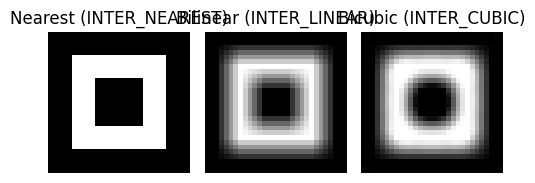

In [42]:
# Define scaling factors
fx, fy = 5, 5

methods = {
    "Nearest (INTER_NEAREST)": cv.INTER_NEAREST,
    "Bilinear (INTER_LINEAR)": cv.INTER_LINEAR,
    "Bicubic (INTER_CUBIC)": cv.INTER_CUBIC
}

for i, (name, method) in enumerate(methods.items(), start=2):
    resized_img = cv.resize(imgtest, None, fx=fx, fy=fy, interpolation=method)
    plt.subplot(1, 4, i)
    plt.imshow(resized_img, cmap='gray', vmin=0, vmax=255)
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()

After experimenting with the test image, you will now apply the `resize()` function to a **real-world image**, `cameraman.png`. This will allow you to observe how resizing affects a more complex image compared to the simple structured pattern of `imgtest`.  

To analyze the effects of resizing, follow these steps:  

1. Resize `cameraman.png` by adjusting `fx` and `fy` values to scale the image both up and down.  
2. Apply a scaling factor between `0` and `1` to shrink the image while maintaining aspect ratio.  
3. Resize the image by specifying exact dimensions (`rows = 250`, `cols = 400`) instead of using scale factors.  
4. Compare the resized outputs with those from `imgtest` and discuss how interpolation affects a natural image differently from a synthetic one.  


IndexError: index 6 is out of bounds for axis 0 with size 6

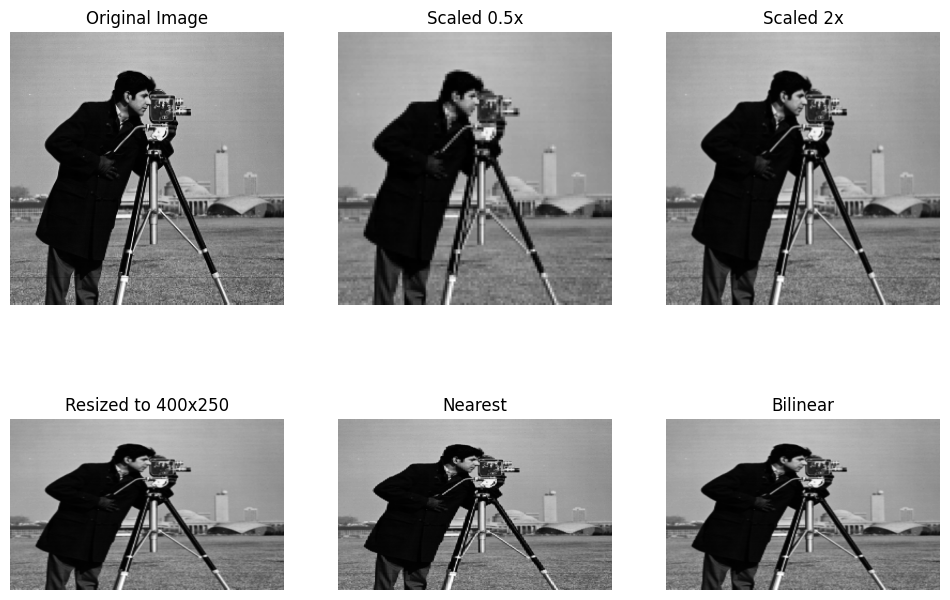

In [43]:
# Define scaling factors for resizing
scale_factors = [0.5, 2] 
fixed_size = (400, 250)  

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

axes[0].imshow(cameraman_img, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

for i, scale in enumerate(scale_factors, start=1):
    resized_img = cv.resize(cameraman_img, None, fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)
    axes[i].imshow(resized_img, cmap='gray')
    axes[i].set_title(f"Scaled {scale}x")
    axes[i].axis("off")

# Resize to specific dimensions
resized_fixed = cv.resize(cameraman_img, fixed_size, interpolation=cv.INTER_LINEAR)
axes[3].imshow(resized_fixed, cmap='gray')
axes[3].set_title("Resized to 400x250")
axes[3].axis("off")

methods = {
    "Nearest": cv.INTER_NEAREST,
    "Bilinear": cv.INTER_LINEAR,
    "Bicubic": cv.INTER_CUBIC
}

for i, (name, method) in enumerate(methods.items(), start=4):
    resized_img = cv.resize(cameraman_img, fixed_size, interpolation=method)
    axes[i].imshow(resized_img, cmap='gray')
    axes[i].set_title(name)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

### Questions:
After applying the `resize()` function to both `imgtest` and `cameraman.png`, analyze the results by answering the following questions:  

1. How does resizing a structured test image (`imgtest`) compare to resizing a real-world image (`cameraman.png`)?  
2. What differences do you observe when using different interpolation methods?  
3. How does resizing with a scaling factor (`fx`, `fy`) differ from specifying exact dimensions (`rows`, `cols`)?  
4. Which method produces the best visual quality for **upscaling** and which one for **downscaling**? Explain why.
5. Analyse this transformation considering the aspect ratio.
6. Analyze and compare the obtained resized images with those obtained using the function you implementd in **T1.1**.

---

***Add your analysis and comments here***  

1 - we notice in resizing the structured test image  imgtest that it is chaning completely after resizing but this is due the small image size , however in the real world image the resizing keeps the gneral form at least , also hte scaling up in the imgtest is affecting it very diffretly compared to the real world image were only a kind of focus happened.
 2 - the first 3 images after the original are downscaled with the same factor with threee diffrent algorithms and the NN is the worst one causing a lot of resolutoin loss , while in the 2 other algorithms we can see a more smoothness

 3 - Scaling factors: Proportional resizing, preserves aspect ratio if `fx == fy`.
   - Exact dimensions:  Directly sets dimensions, may not preserve aspect ratio.

 4 -
 Bicubic interpolation  produces the best visual quality.  It uses a larger kernel (16 surrounding pixels) and cubic polynomials to calculate pixel values, resulting in smoother transitions and fewer artifacts compared to nearest-neighbor or bilinear interpolation.  Nearest-neighbor interpolation in upscaling often leads to noticeable pixelation or blockiness, while bilinear interpolation produces a less sharp, slightly blurry result.




## Task 2: Image translation  

Geometric transformations involve mathematical operations that modify the coordinates of the image's pixels. These transformations are typically represented using transformation matrices that define how each point in the image is repositioned.  

#### **Understanding translation**  

Translation refers to shifting an image by a specified number of pixels along the **x-axis** and **y-axis**. This operation moves every pixel in the image without altering its shape, size or orientation.  

Mathematically, translation is represented as follows:  

$$
\begin{bmatrix}
x' \\ y'
\end{bmatrix}
=
\begin{bmatrix}
x + \Delta x \\ y + \Delta y
\end{bmatrix}
$$  

where:  

- \( $x'$ \) and \( $y'$ \) are the new coordinates after translation.  
- \( $x$ \) and \( $y$ \) are the original coordinates of the pixel.  
- \( $\Delta x$ \) and \( $\Delta y$ \) are the translation offsets along the horizontal and vertical axes, respectively.  

Translation is often used for **image alignment, object tracking, and perspective adjustments** in computer vision tasks.  


-------
**Exampel of translation**

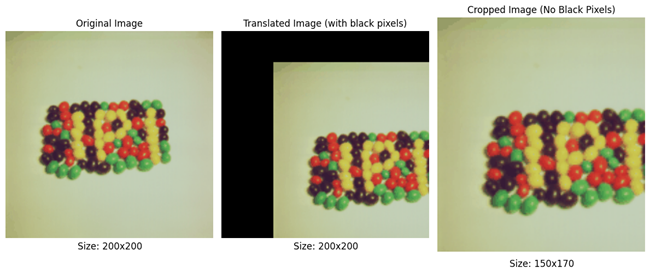


In this task, you will apply **image translation** using OpenCV's `warpAffine()` function to shift an image in different directions.  

### **Instructions:**  
1. Select an image from the given `images` folder to perform the translation.  
2. Translate the image by shifting:  
   - 100 pixels horizontally (along the x-axis).  
   - 200 pixels vertically (along the y-axis).  
   - Both axes simultaneously (100 pixels right and 200 pixels down).  
3. Remove the black pixels that appear after translation.  
4. Use the function `warpAffine()` from the `cv2` module to apply the transformation.  
5. Analyze the results by observing how translation affects the image and discussing potential use cases.  


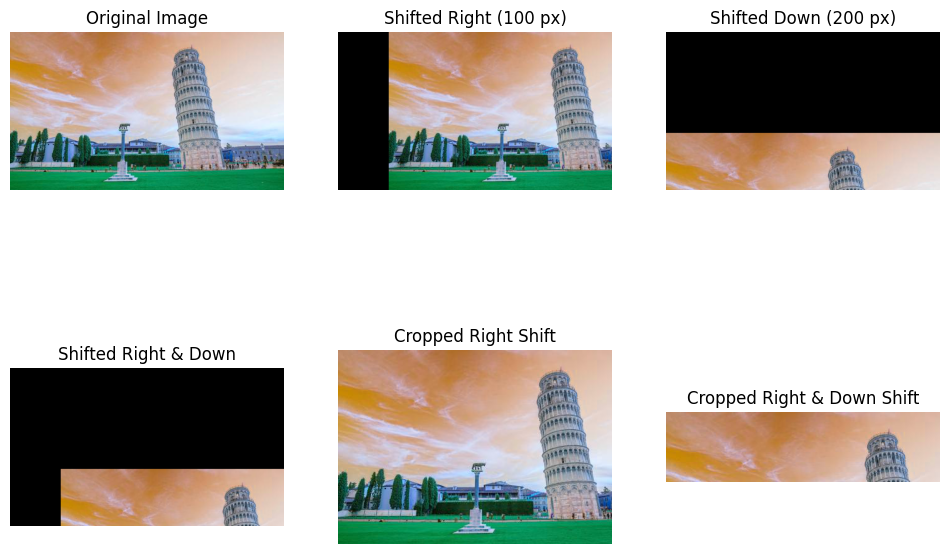

In [49]:
# Perform image translation as described above.
img = cv.imread('Images/leaning.jpg', cv.COLOR_BGR2RGB)

height, width = img.shape[:2]

# Define translation matrices
M_x = np.float32([[1, 0, 100], [0, 1, 0]])  
M_y = np.float32([[1, 0, 0], [0, 1, 200]]) 
M_xy = np.float32([[1, 0, 100], [0, 1, 200]]) 

# Apply transformations
translated_x = cv.warpAffine(img, M_x, (width, height))
translated_y = cv.warpAffine(img, M_y, (width, height))
translated_xy = cv.warpAffine(img, M_xy, (width, height))

# Crop to remove black regions
cropped_x = translated_x[:, 100:]  
cropped_y = translated_y[200:, :]  
cropped_xy = translated_xy[200:, 100:]  

# Display results
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].imshow(img )
axes[0, 0].set_title("Original Image")

axes[0, 1].imshow(translated_x)
axes[0, 1].set_title("Shifted Right (100 px)")

axes[0, 2].imshow(translated_y)
axes[0, 2].set_title("Shifted Down (200 px)")

axes[1, 0].imshow(translated_xy)
axes[1, 0].set_title("Shifted Right & Down")

axes[1, 1].imshow(cropped_x)
axes[1, 1].set_title("Cropped Right Shift")

axes[1, 2].imshow(cropped_xy)
axes[1, 2].set_title("Cropped Right & Down Shift")

for ax in axes.ravel():
    ax.axis('off')

plt.show()



### Questions:
1. How does translating the image affect its appearance?  
2. What happens to the pixels that are shifted beyond the image boundaries?  
3. Why do black pixels appear after translation, and how can they be removed effectively?  
4. Compare translating along a **single axis ($x$ or $y$)** vs. translating along **both axes simultaneously**—what differences do you notice?
   

***Add your analysis and comments here***  
1-   Translating an image shifts its content horizontally and/or vertically.  
  The image itself remains unchanged in terms of pixel values or content, but its position within the image plane is altered.

2 - Pixels shifted beyond the image boundaries are lost.  The `warpAffine` function doesn't wrap the pixels around; the areas where the original image no longer exists are filled with black pixels (default background color).

3 -   Black pixels appear because the `warpAffine` function, by default, fills the new image space with black pixels in the area where the original image doesn't fully cover. The `remove_black_borders` function effectively crops the translated image, removing the areas where these black pixels dominate, thus revealing only the shifted image content.

4 -  Translating along a single axis shifts the image only in that direction (horizontal or vertical).  Translating along both axes simultaneously shifts the image diagonally.  The magnitude of the shift in each direction (x and y) determines the angle and extent of the diagonal shift.  The cropping in both cases needs to be adjusted depending on the axis that was shifted.


#### **Challenge 1: Translating an Object**  

In this challenge, you will apply translation to animate the movement of an object inside an image.  

**Use `Circle.png` as the input image**.


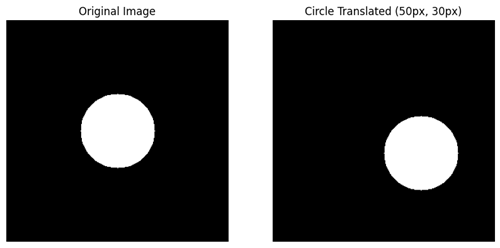

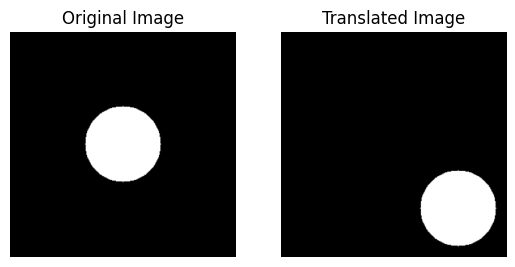

In [52]:
# Challenge 1: Apply static translation to the image.
img = cv.imread('Images/Circle.png', cv.IMREAD_GRAYSCALE)
M = np.float32([[1, 0, 100], [0, 1, 100]])
img_translated = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_translated, cmap='gray')
plt.title('Translated Image')
plt.axis('off')

plt.show()


#### **Challenge 2: Dynamic Object Translation**  
1. Perform horizontal translation → Shift the white circle continuously to the right. Once it reaches the image boundary, it should reappear from the left side.  
2. Perform vertical translation → Shift the circle downward, ensuring it wraps around and reappears from the top.  
3. Apply sinewave-based horizontal translation → Make the circle follow a sinusoidal path as it moves horizontally.  
4. Generate an animation to visualize the movement over time.  



To create a video file, you first need to initialize a **`VideoWriter`** object.  


- Step 1: Define the codec (video format)

  `fourcc = cv2.VideoWriter_fourcc(*'mp4v')`

- Step 2: Create the video writer

  `video_writer = cv2.VideoWriter('your/saving/path/output_video.mp4', fourcc, 30, (image_width, image_height))`

- Step 3: Write frames (each frame corresponds to one translation step) to the video inside a loop

  `video_writer.write(frame)`

- Step 4: Release the video writer (finalize the video file once the loop ends)

  `video_writer.release()`

In [74]:
image_width = 500
image_height = 500

# Circle properties
circle_radius = 30
circle_center = (250, 250)

# Create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')
video_writer = cv.VideoWriter('dynamic_translation_video.mp4', fourcc, 30, (image_width, image_height))

# Function to draw the circle on the image
def draw_circle(image, center, radius=30):
    center_int = (int(center[0]), int(center[1]))
    img_copy = image.copy()
    cv.circle(img_copy, center_int, radius, (255, 255, 255), -1)
    return img_copy

In [75]:
def horizontal_translation(image, center, step, width):
    # Shift right by 'step' pixels; wrap around using modulo
    new_center = ((center[0] + step) % width, center[1])
    return draw_circle(image, new_center, circle_radius), new_center

def vertical_translation(image, center, step, height):
    # Shift down by 'step' pixels; wrap around using modulo
    new_center = (center[0], (center[1] + step) % height)
    return draw_circle(image, new_center, circle_radius), new_center

def sinewave_translation(image, center, step, width, amplitude, frame):
    # Shift horizontally with sine modulation; use frame to change the sine phase
    new_x = int(center[0] + step + amplitude * math.sin(2 * math.pi * frame / 50))
    new_center = (new_x % width, center[1])
    return draw_circle(image, new_center, circle_radius), new_center

In [ ]:
import math
# ---------------------------
# 1. Horizontal Translation Video
# ---------------------------
horizontal_writer = cv.VideoWriter('horizontal_translation_video.mp4', fourcc, fps, (image_width, image_height))
center = circle_center  # reset center for this video

for frame in range(num_frames):
    # Pass the background image as the first argument
    frame_img, center = horizontal_translation(background_image, center, step=step_size, width=image_width)
    # Convert grayscale to BGR for video writing
    horizontal_writer.write(cv.cvtColor(frame_img, cv.COLOR_GRAY2BGR))
horizontal_writer.release()

# ---------------------------
# 2. Vertical Translation Video
# ---------------------------
vertical_writer = cv.VideoWriter('vertical_translation_video.mp4', fourcc, fps, (image_width, image_height))
center = circle_center  

for frame in range(num_frames):
    frame_img, center = vertical_translation(background_image, center, step=step_size, height=image_height)
    vertical_writer.write(cv.cvtColor(frame_img, cv.COLOR_GRAY2BGR))
vertical_writer.release()

# ---------------------------
# 3. Sinewave-Based Horizontal Translation Video
# ---------------------------
sinewave_writer = cv.VideoWriter('sinewave_translation_video.mp4', fourcc, fps, (image_width, image_height))
center = circle_center  

for frame in range(num_frames):
    frame_img, center = sinewave_translation(background_image, center, step=step_size, width=image_width, amplitude=amplitude, frame=frame)
    sinewave_writer.write(cv.cvtColor(frame_img, cv.COLOR_GRAY2BGR))
sinewave_writer.release()

print("Videos generated:")
print(" - horizontal_translation_video.mp4")
print(" - vertical_translation_video.mp4")
print(" - sinewave_translation_video.mp4")

Videos generated:
 - horizontal_translation_video.mp4
 - vertical_translation_video.mp4
 - sinewave_translation_video.mp4


## Task 3: Image Rotation

Rotation is a geometric transformation that rotates an image around a fixed point (usually the center). The transformation is represented by the following mathematical formula:  

$$
\begin{bmatrix}
x' \\ y'
\end{bmatrix} =
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
\begin{bmatrix}
x \\ y
\end{bmatrix}
$$  

where:  
- \( $x'$ \), \( $y'$ \) are the **new coordinates** after rotation.  
- \( $x$ \), \( $y$ \) are the **original coordinates** of the pixel.  
- \( $\theta$ \) is the **rotation angle** in degrees.  
---

### **Instructions:**  
1. Choose an image from the `images` folder.
1. Write a program to rotate an image at different angles, such as **45°**, **90°**, and a full **360°** rotation.
2. Use `cv2.getRotationMatrix2D()` to generate the rotation matrix and apply it to the image.  
3. Analyze the results by observing how rotation affects the image, especially at different angles.  


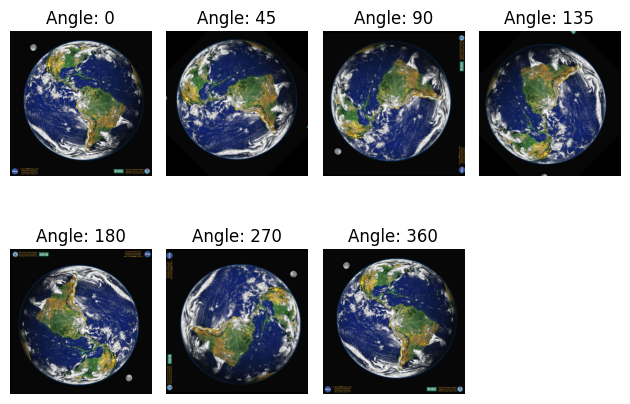

In [80]:
# Apply image rotation using cv2.getRotationMatrix2D() at different angles.
earth_img = cv.imread('Images/Earth.bmp', cv.IMREAD_COLOR)
height, width = earth_img.shape[:2]
# Define the rotation angles in degrees
angles = [0, 45, 90, 135, 180, 270, 360]
# Iterate over the angles and apply rotation
for i, angle in enumerate(angles, start=1):
    M = cv.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_img = cv.warpAffine(earth_img, M, (width, height))
    plt.subplot(2, 4, i)
    plt.imshow(cv.cvtColor(rotated_img, cv.COLOR_BGR2RGB))
    plt.title(f"Angle: {angle}")
    plt.axis('off')
    
plt.tight_layout()
plt.show()





### Questions:
1. What happens to the image dimensions after rotation? Why do some rotations introduce black borders?  
2. How does OpenCV handle **out-of-frame pixels** during rotation?  


***Add your analysis and comments here***  

### Image dimensions after rotation:

 When you rotate an image, the dimensions of the resulting image can change, particularly if the rotation angle is not a multiple of 90 degrees.  The new dimensions are determined by the original dimensions, the rotation angle, and how OpenCV handles the out-of-frame pixels.

### Black borders after rotation:

 Black borders appear after rotation when the rotated image extends beyond the original image's boundaries.  To understand why, consider rotating a square image by 45 degrees.  The corners of the original image will now be further away from the center than they were before, and these new corner positions will fall outside of the original image's dimensions. OpenCV's default behavior in these cases is to fill the regions outside the original dimensions with black pixels.

 OpenCV's handling of out-of-frame pixels during rotation:
 OpenCV's `cv2.warpAffine` function performs the rotation using an affine transformation. During this process, pixels that fall outside the original image boundaries, as described above, are typically treated as having pixel values of zero (black) by default.
 You can control this behavior by specifying interpolation methods (like nearest neighbor or bilinear) which change how the values of the newly introduced pixels due to rotation are calculated.  You can also use the `borderMode` and `borderValue` flags in warpAffine to change the way the borders are handled.

#### **Challenge: Custom Rotation Point**  

By default, image rotation occurs around the **center of the image**. In this challenge, you will modify the transformation to **rotate an image around a custom point** instead.  

### **Instructions:**  
1. Use the same image as before or choose a different one from the `images` folder.  
2. Select a custom pivot point (e.g., a corner, an off-center point, or a specific feature in the image).  
3. Use `cv2.getRotationMatrix2D()` to compute the transformation matrix based on the chosen pivot point.  
4. Apply the rotation and display the resulting image.  
5. Analyze the difference between center-based rotation and custom-point rotation.  


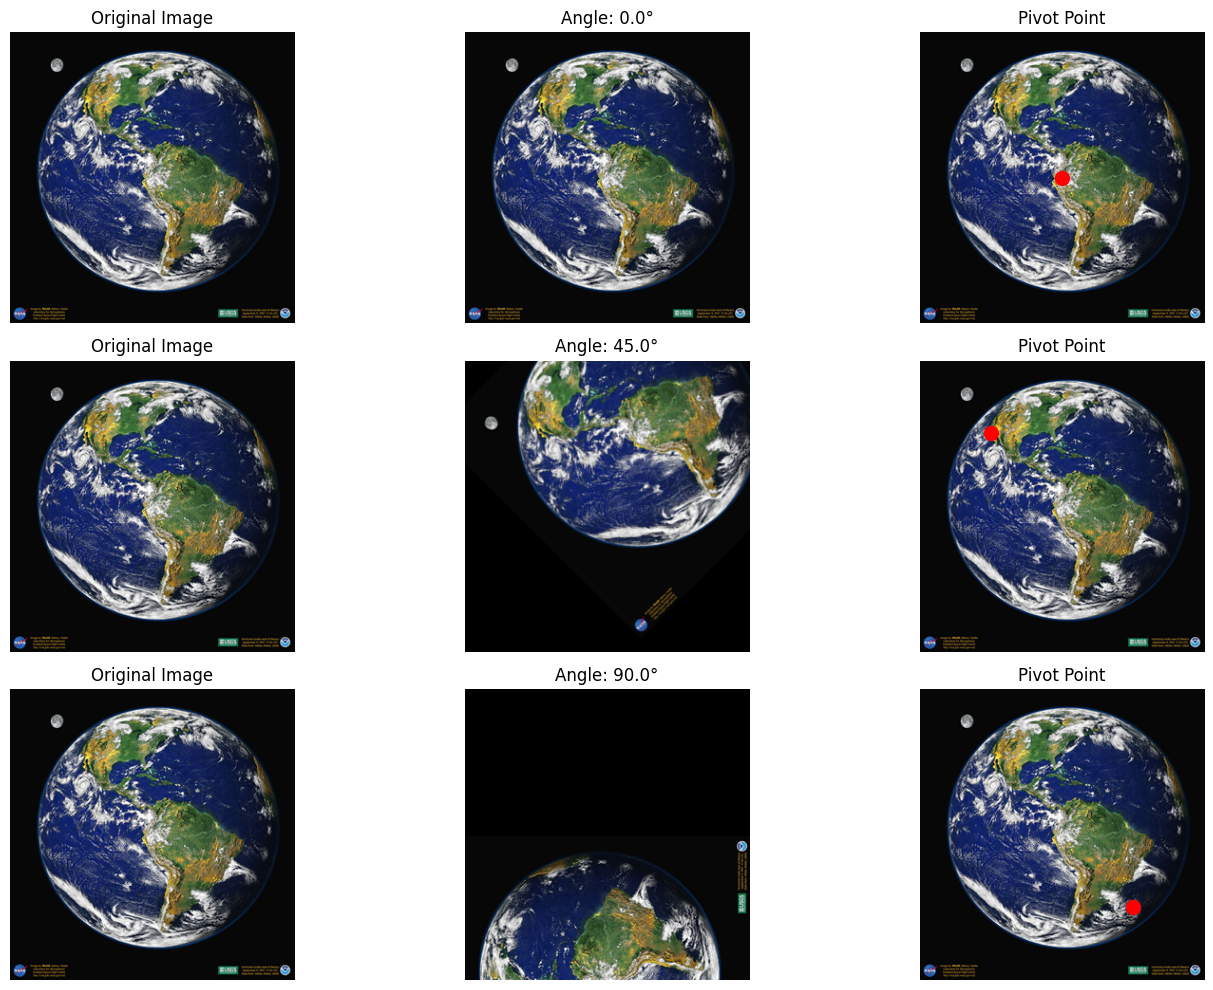

In [84]:
# Challenge: Apply rotation around custom pivot points instead of the center.
earth_img = cv.imread('Images/Earth.bmp', cv.IMREAD_COLOR)
height, width = earth_img.shape[:2]

# Define the pivot points for rotation
pivot_points = [(width // 2, height // 2), (width // 4, height // 4), (width * 3 // 4, height * 3 // 4)]
# Define the rotation angles in radians
angles = [0, np.pi / 4, np.pi / 2, np.pi, 3 * np.pi / 2]
# Apply rotation around each pivot point
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, (pivot, angle) in enumerate(zip(pivot_points, angles)):
    # Get the rotation matrix for the given angle
    M = cv.getRotationMatrix2D(pivot, angle * 180 / np.pi, 1)
    # Apply the rotation to the image
    rotated_img = cv.warpAffine(earth_img, M, (width, height))
    # Display the rotated image
    axes[i, 0].imshow(cv.cvtColor(earth_img, cv.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')
    axes[i, 1].imshow(cv.cvtColor(rotated_img, cv.COLOR_BGR2RGB))
    axes[i, 1].set_title(f"Angle: {angle * 180 / np.pi}°")
    axes[i, 1].axis('off')
    # Display the pivot point
    axes[i, 2].imshow(cv.cvtColor(earth_img, cv.COLOR_BGR2RGB))
    axes[i, 2].set_title("Pivot Point")
    axes[i, 2].scatter(*pivot, color='red', s=100)
    axes[i, 2].axis('off')
    
plt.tight_layout()
plt.show()

    


## Task 4: Affine Transformation  

Affine transformations are a class of geometric transformations that preserve **collinearity** (straight lines remain straight) and **ratios of distances** between points. They include operations such as **scaling, rotation, shearing, and translation**.  


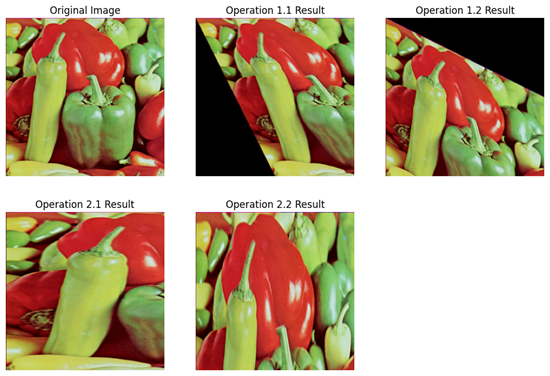

### Analysis of the Transformation:
1. Analyze the given output and determine what type of **transformation** has been applied to the `pepper.png` image.  
2. Explain the effects of the transformation and how it affects the image structure.   

***Add your analysis and comments here***  
### Common Image Transformations and Their Effects

1. **Translation**:
   - **Effect**: Shifts the image in the x or y direction.
   - **Image Structure**: The entire image moves, and parts of the image may move out of the frame, while new areas may appear as black or white (depending on the background).

2. **Rotation**:
   - **Effect**: Rotates the image around a specified point (usually the center).
   - **Image Structure**: The image appears turned by a certain angle. Parts of the image may move out of the frame, and new areas may appear as black or white.

3. **Scaling**:
   - **Effect**: Enlarges or reduces the size of the image.
   - **Image Structure**: The image size changes, but the aspect ratio may or may not be preserved. Enlarging can cause pixelation, while reducing can cause loss of detail.

4. **Shearing**:
   - **Effect**: Slants the image along the x or y axis.
   - **Image Structure**: The image appears skewed, with straight lines becoming slanted.

5. **Reflection**:
   - **Effect**: Flips the image along a specified axis (horizontal or vertical).
   - **Image Structure**: The image appears mirrored along the chosen axis.

6. **Affine Transformation**:
   - **Effect**: Applies a combination of translation, rotation, scaling, and shearing.
   - **Image Structure**: The image undergoes a complex transformation that can change its shape and orientation.

7. **Perspective Transformation**:
   - **Effect**: Changes the perspective of the image as if viewed from a different angle.
   - **Image Structure**: The image appears distorted, with lines converging towards vanishing points.



### **Instructions:**  

1. Use the appropriate OpenCV functions to **reproduce the transformations** observed in the output.  
2. Display the transformed images and compare them with the original.

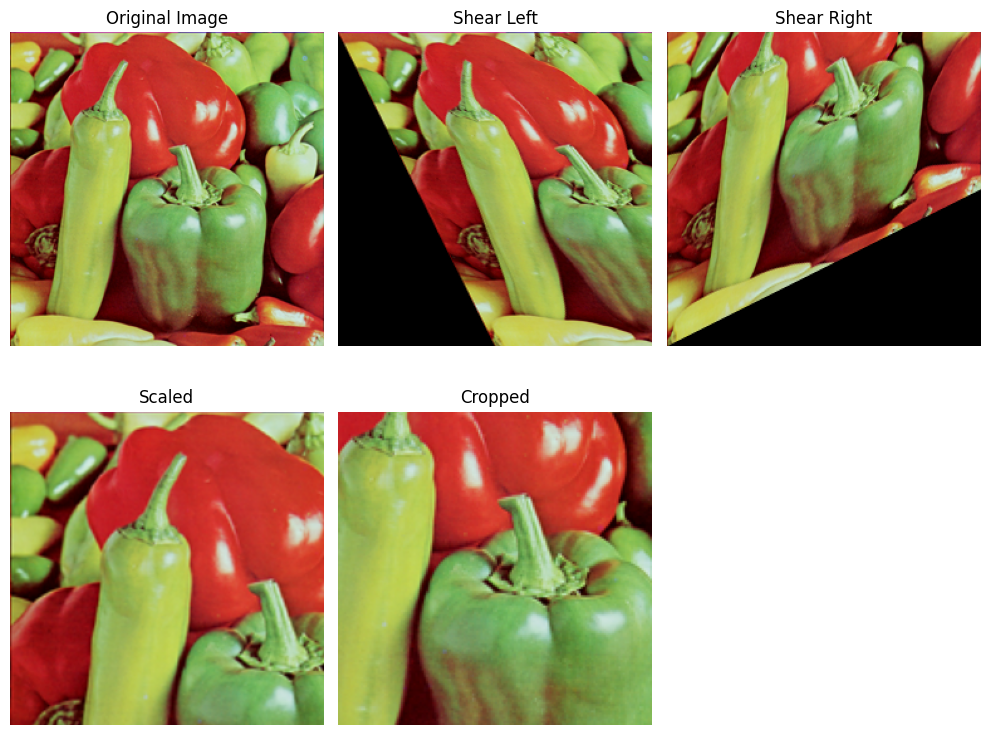

In [15]:
# Apply and reproduce the affine transformations observed in the given output.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
img = cv2.imread('Images/pepper.bmp')  # Replace with actual image filename
h, w = img.shape[:2]  # Get image dimensions

# Define points for Affine Transformation
src_pts = np.float32([[50, 50], [200, 50], [50, 200]])



# 1.2 Shear transformation (right shear)
shear_right = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_right = cv2.warpAffine(img, shear_right, (w, h))

# 1.1 Shear transformation (left shear)
shear_left = np.float32([[1, 0, 0], [-0.5, 1, 0]])
sheared_left = cv2.warpAffine(img, shear_left, (w, h))


# 2.1 Scaling (zoom in)
scale_matrix = np.float32([[1.5, 0, 0], [0, 1.5, 0]])
scaled_img = cv2.warpAffine(img, scale_matrix, (w, h))

# 2.2 Cropping (zoomed region)
cropped_img = img[50:h-50, 50:w-50]  # Cropping the central region

# Display images
titles = ["Original Image", "Shear Left", "Shear Right", "Scaled", "Cropped"]
images = [img, sheared_right ,sheared_left, scaled_img, cropped_img]

plt.figure(figsize=(10, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


#### **Challenge: Aligning a Tilted Image**  

In this challenge, you will correct the alignment of an image that appears **tilted or skewed**.  

- Use `leaning.jpg` from the `images` folder as the input image.  
- Apply the necessary transformations to straighten the image.  

### **Instructions:**  
1. Load `leaning.jpg` and analyze its tilt.  
2. Determine the transformation needed to correct its alignment (e.g., rotation, affine transformation, perspective correction).  
3. Use OpenCV functions such as `cv2.getRotationMatrix2D()` or `cv2.warpAffine()` to straighten the image.  
4. Display both the original and corrected images side by side for comparison.  
5. Analyze the results, explaining how alignment correction improves image perception.  


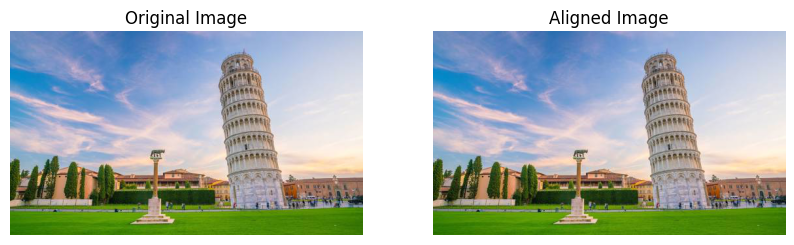

In [16]:
# Apply transformation to align leaning.jpg.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Images/leaning.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Find the average angle of detected lines
angles = []
if lines is not None:
    for rho, theta in lines[:, 0]:
        angle = (theta * 180 / np.pi) - 90  # Convert to degrees and shift reference
        angles.append(angle)

# Calculate the median angle (more robust to outliers)
if angles:
    median_angle = np.median(angles)
else:
    median_angle = 0

# Get image dimensions
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

# Compute rotation matrix and apply affine transformation
rotation_matrix = cv2.getRotationMatrix2D(center, median_angle, 1.0)
aligned_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

# Convert images to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
aligned_rgb = cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB)

# Display the original and corrected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(aligned_rgb)
plt.title("Aligned Image")
plt.axis("off")

plt.show()



***Add your analysis and comments here***  

**Detected Angle:** The median rotation angle detected is approximately 0.00°, indicating the algorithm did not find a significant tilt.

**Alignment Process:**

The algorithm identifies lines using Canny edge detection and Hough Transform.
It calculates the median angle from detected lines and applies affine transformation to correct the image.

**Why No Correction Was Applied:**

Either the image is already well-aligned, or the dominant edges detected are horizontal/vertical.
If the tilt is subtle or complex (e.g., curved structures like the Leaning Tower of Pisa), the Hough Transform may struggle to identify the precise angle.

## Task 5: Perspective Transformation  

Perspective transformation is a geometric operation that maps an image **from one perspective** to another, commonly used for rectifying distortions or simulating different viewpoints.  

### **Instructions:**  
1. Analyze the given transformed images and identify the type of perspective transformations applied.  
2. Explain how these transformations affect the image structure, such as warping, foreshortening, or rectification.  
3. Use OpenCV functions like `cv2.getPerspectiveTransform()` and `cv2.warpPerspective()` to reproduce the transformations using the `Earth.bmp` image.  
4. Compare the transformed images with the original and discuss your observations.  


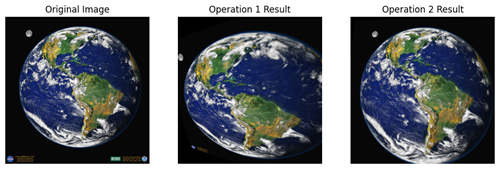

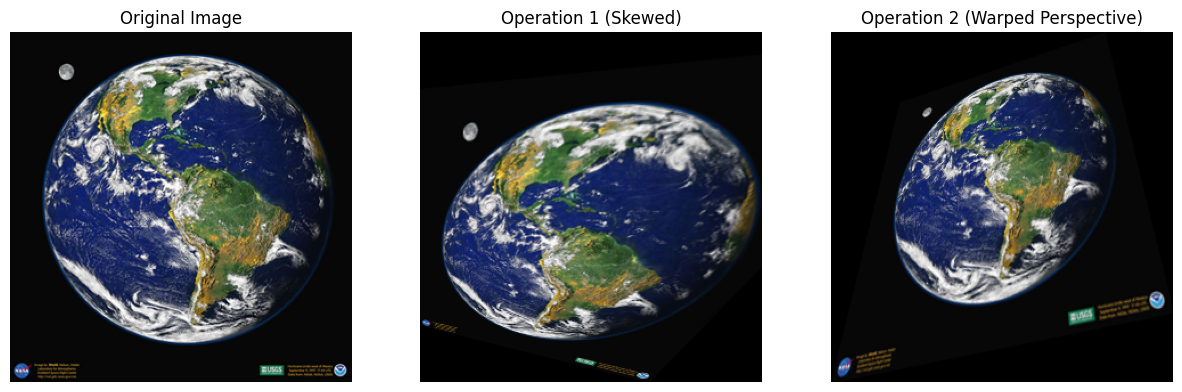

In [17]:
# Apply perspective transformation here.
# Apply perspective transformation here.
# Load the Earth image
earth_image_path = "Images/Earth.bmp"
image = cv2.imread(earth_image_path)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError("Earth.bmp not found. Please upload the correct image.")

# Get image dimensions
(h, w) = image.shape[:2]

# Define points for a skewed perspective transformation (Operation 1)
src_pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])

# Define Destination Points (Horizontally Stretched and Skewed)
dst_pts1 = np.float32([[0, 50],  # Move top-left slightly down
                      [w+200, 0],  # Stretch top-right outward
                      [0, h-50],  # Move bottom-left up
                      [w-100, h]])  # Shift bottom-right left

# Compute the transformation matrix and apply warpPerspective
matrix1 = cv2.getPerspectiveTransform(src_pts1, dst_pts1)
transformed1 = cv2.warpPerspective(image, matrix1, (w, h))

# Define points for a more distorted perspective (Operation 2)
src_pts2 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])
dst_pts2 = np.float32([[w*0.2, h*0.2], [w*0.8, 0], [0, h], [w, h*0.8]])

# Compute the transformation matrix and apply warpPerspective
matrix2 = cv2.getPerspectiveTransform(src_pts2, dst_pts2)
transformed2 = cv2.warpPerspective(image, matrix2, (w, h))

# Convert images to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
transformed1_rgb = cv2.cvtColor(transformed1, cv2.COLOR_BGR2RGB)
transformed2_rgb = cv2.cvtColor(transformed2, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(transformed1_rgb)
plt.title("Operation 1 (Skewed)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(transformed2_rgb)
plt.title("Operation 2 (Warped Perspective)")
plt.axis("off")

plt.show()




***Add your analysis and comments here***  
**Operation 1 Result (Middle Image)**

The Earth appears slightly skewed but maintains a roughly rectangular shape.
This transformation suggests affine warping or a perspective shift, where the image is adjusted without significantly altering proportions.

**Operation 2 Result (Right Image)**

The Earth appears more circular, with a stronger warping effect.
This transformation likely involves a perspective distortion (e.g., simulating a wide-angle or fish-eye effect), which bends the straight edges.

#### **Challenge: Bird's Eye View Transformation**  

In this challenge, you will apply **geometric transformations** to align an image similar to the example shown below.  

- Use `road.png` from the `images` folder as the input image.  
- Apply the same transformation as demonstrated in the reference image below.  

![Road Alignment Example](https://journals.sagepub.com/cms/10.1177/09544070231203059/asset/images/large/10.1177_09544070231203059-fig10.jpeg)  

### **Instructions:**  
1. Apply a **perspective transformation** to align `road.png` using `cv2.getPerspectiveTransform()` and `cv2.warpPerspective()`.  
2. Apply the transformation and display the corrected image.  
3. Compare your result with the original image and the reference example.  


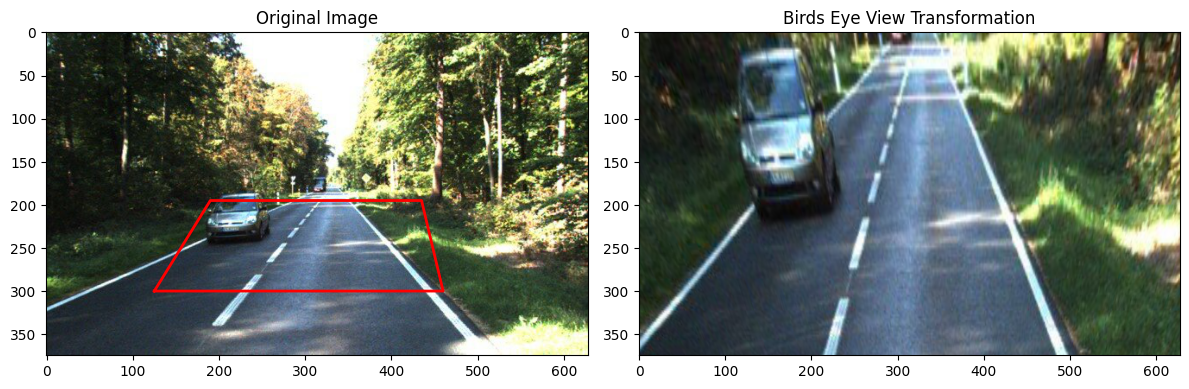

Transformation complete! Image saved as 'transformed_road.png'


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def birds_eye_view_transform(image_path):
    # Read the input image
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Error: Could not read image from {image_path}")
        return None
    
    # Convert to RGB for matplotlib display (OpenCV uses BGR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get image dimensions
    height, width = img.shape[:2]
    
    # Define source points (points in the original image)
    src_points = np.float32([
        [125, 300],    # Bottom left
        [460, 300],    # Bottom right
        [435, 195],    # Top right
        [190, 195]     # Top left
    ])
    
    # Define destination points (where source points will map to in the output)
    dst_points = np.float32([
        [100, 350],     # Bottom left
        [500, 350],     # Bottom right
        [500, 50],      # Top right
        [100, 50]       # Top left
    ])
    
    # Compute the perspective transform matrix
    matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    
    # Apply the perspective transformation
    warped = cv2.warpPerspective(img, matrix, (width, height))
    warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
    
    # Visualize the transformation
    plt.figure(figsize=(12, 6))
    
    # Original image with source points
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img_rgb)
    
    # Draw the source points as a polygon
    src_points_plot = np.vstack([src_points, src_points[0]])  # Close the polygon
    plt.plot(src_points_plot[:, 0], src_points_plot[:, 1], 'r-', linewidth=2)
    
    # Transformed image
    plt.subplot(1, 2, 2)
    plt.title('Birds Eye View Transformation')
    plt.imshow(warped_rgb)
    
    plt.tight_layout()
    plt.show()
    
    return warped

# Usage:
if __name__ == "__main__":
    image_path = "images/road.png"
    transformed_image = birds_eye_view_transform(image_path)
    
    if transformed_image is not None:
        # Save the transformed image if needed
        cv2.imwrite("transformed_road.png", transformed_image)
        print("Transformation complete! Image saved as 'transformed_road.png'")

---
## Manipulation 2: Bitwise Logical Operators  

Bitwise logical operators allow us to perform **pixel-wise operations** on images. These operations are useful for **masking, blending, and extracting regions of interest** in an image.  

In OpenCV, bitwise operations are applied using `cv2.bitwise_*()` functions, which perform logical operations at the **pixel level**. Each pixel's value is modified based on the corresponding pixel values from input images, following standard **bitwise logic rules** (AND, OR, XOR, NOT).  

These operations are commonly used in **image processing** tasks, such as:  
- **Creating masks to isolate parts of an image**  
- **Combining or blending two images based on logical conditions**  
- **Extracting foreground or background elements**  



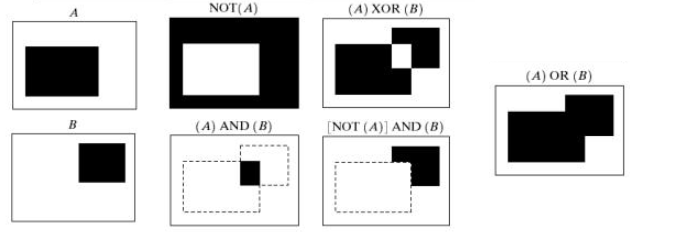
----

## Task 1: Creating and Applying Logical Operations on Binary Images  

In this task, you will generate two **binary images** and apply logical operations both **manually** and using **OpenCV functions**.  

### **Image Specifications:**  
- **Image A (256×256 pixels)** contains a **black rectangle** at coordinates **$90 ≤ x ≤ 120$** and **$90 ≤ y ≤ 180$**.  
- **Image B (256×256 pixels)** contains a **black square** at coordinates **$110 ≤ x ≤ 150$** and **$110 ≤ y ≤ 150$**.    


### **Instructions:**  

1. Create Image **A** and Image **B** using NumPy, ensuring correct pixel placements.  
2. Implement logical operations (NOT, AND, OR, XOR) manually, without using OpenCV functions.  
3. Apply logical operations using OpenCV functions:  
   - `cv2.bitwise_not()`  
   - `cv2.bitwise_and()`  
   - `cv2.bitwise_or()`  
   - `cv2.bitwise_xor()`  

4. Analyze the results, comparing the output of manual implementation with OpenCV’s built-in functions.  

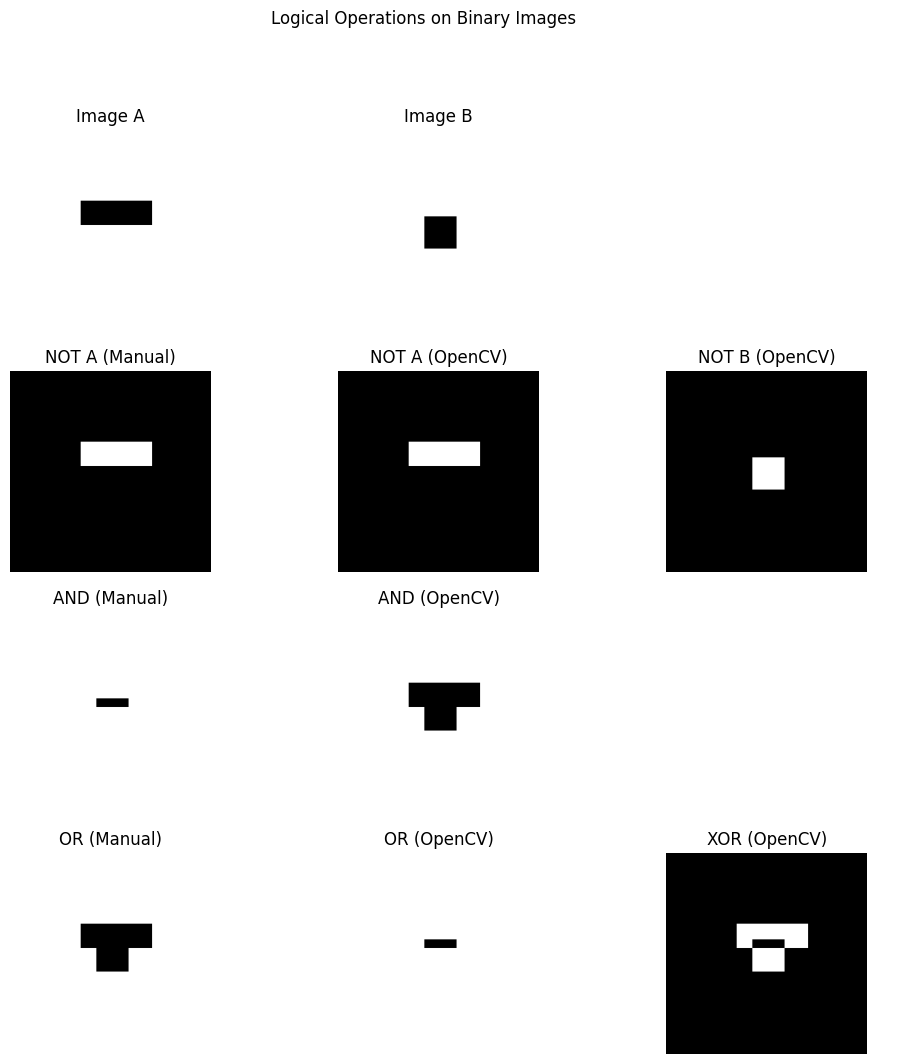

In [20]:
# Add the corresponding code here.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create Image A (256x256) with a black rectangle
image_a = np.ones((256, 256), dtype=np.uint8) * 255  # White background
image_a[90:121, 90:181] = 0  # Black rectangle

# Create Image B (256x256) with a black square
image_b = np.ones((256, 256), dtype=np.uint8) * 255  # White background
image_b[110:151, 110:151] = 0  # Black square

# --- Manual Logical Operations ---
# NOT operation
not_a_manual = np.where(image_a == 255, 0, 255).astype(np.uint8)
not_b_manual = np.where(image_b == 255, 0, 255).astype(np.uint8)

# AND operation
and_manual = np.where((image_a == 0) & (image_b == 0), 0, 255).astype(np.uint8)

# OR operation : means at least one pixel is black.
or_manual = np.where((image_a == 0) | (image_b == 0), 0, 255).astype(np.uint8)

# XOR operation
xor_manual = np.where(((image_a == 0) & (image_b == 255)) | ((image_a == 255) & (image_b == 0)), 0, 255).astype(np.uint8)

# --- OpenCV Logical Operations ---
not_a_cv = cv2.bitwise_not(image_a)
not_b_cv = cv2.bitwise_not(image_b)
and_cv = cv2.bitwise_and(image_a, image_b)
or_cv = cv2.bitwise_or(image_a, image_b)
xor_cv = cv2.bitwise_xor(image_a, image_b)

# --- Visualization ---
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
fig.suptitle("Logical Operations on Binary Images")

images = [
    (image_a, "Image A"),
    (image_b, "Image B"),
    (None, ""),  # Empty placeholder

    (not_a_manual, "NOT A (Manual)"),
    (not_a_cv, "NOT A (OpenCV)"),
    (not_b_cv, "NOT B (OpenCV)"),

    (and_manual, "AND (Manual)"),
    (and_cv, "AND (OpenCV)"),
    (None, ""),  # Empty placeholder

    (or_manual, "OR (Manual)"),
    (or_cv, "OR (OpenCV)"),
    (xor_cv, "XOR (OpenCV)")
]

for ax, (img, title) in zip(axes.ravel(), images):
    if img is not None:
        ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis("off")

plt.show()



In [21]:
# Compare Manual vs OpenCV results
def compare_images(manual, opencv, name):
    if np.array_equal(manual, opencv):
        print(f"{name}: ✅ Identical")
    else:
        diff = np.sum(manual != opencv)
        print(f"{name}: ❌ Different ({diff} differing pixels)")

compare_images(not_a_manual, not_a_cv, "NOT A")
compare_images(and_manual, and_cv, "AND")
compare_images(or_manual, or_cv, "OR")
compare_images(xor_manual, xor_cv, "XOR")


NOT A: ✅ Identical
AND: ❌ Different (3600 differing pixels)
OR: ❌ Different (3600 differing pixels)
XOR: ❌ Different (65536 differing pixels)


***Add your analysis and comments here***  
The manual defined not and the built in operator is the same gicing the same results , however the and operator & with built in are not , the & gives intersection , while the built in gives the union . the or appears to be like the and in the built in , however it is bitwise in the manual defined (at least one black)

## Task 2: Applying Bitwise Logical Operators on Images  

In this task, you will apply **bitwise logical operations** to different image pairs using OpenCV functions that you have previously used.


### **Instructions:**  
1. Apply the bitwise AND operation on `Brain.png` and `BrainM.png` using `cv2.bitwise_and()`.  
2. Apply the bitwise OR operation on `Brain.png` and `BrainM.png` using `cv2.bitwise_or()`.  
3. Apply the bitwise XOR operation on `Before.png` and `After.png` using `cv2.bitwise_xor()`.  
4. Apply the bitwise NOT operation separately on `QR.png` and `Jellybeans.png` using `cv2.bitwise_not()`.  
5. Display the results and analyze how each operation affects the images.  


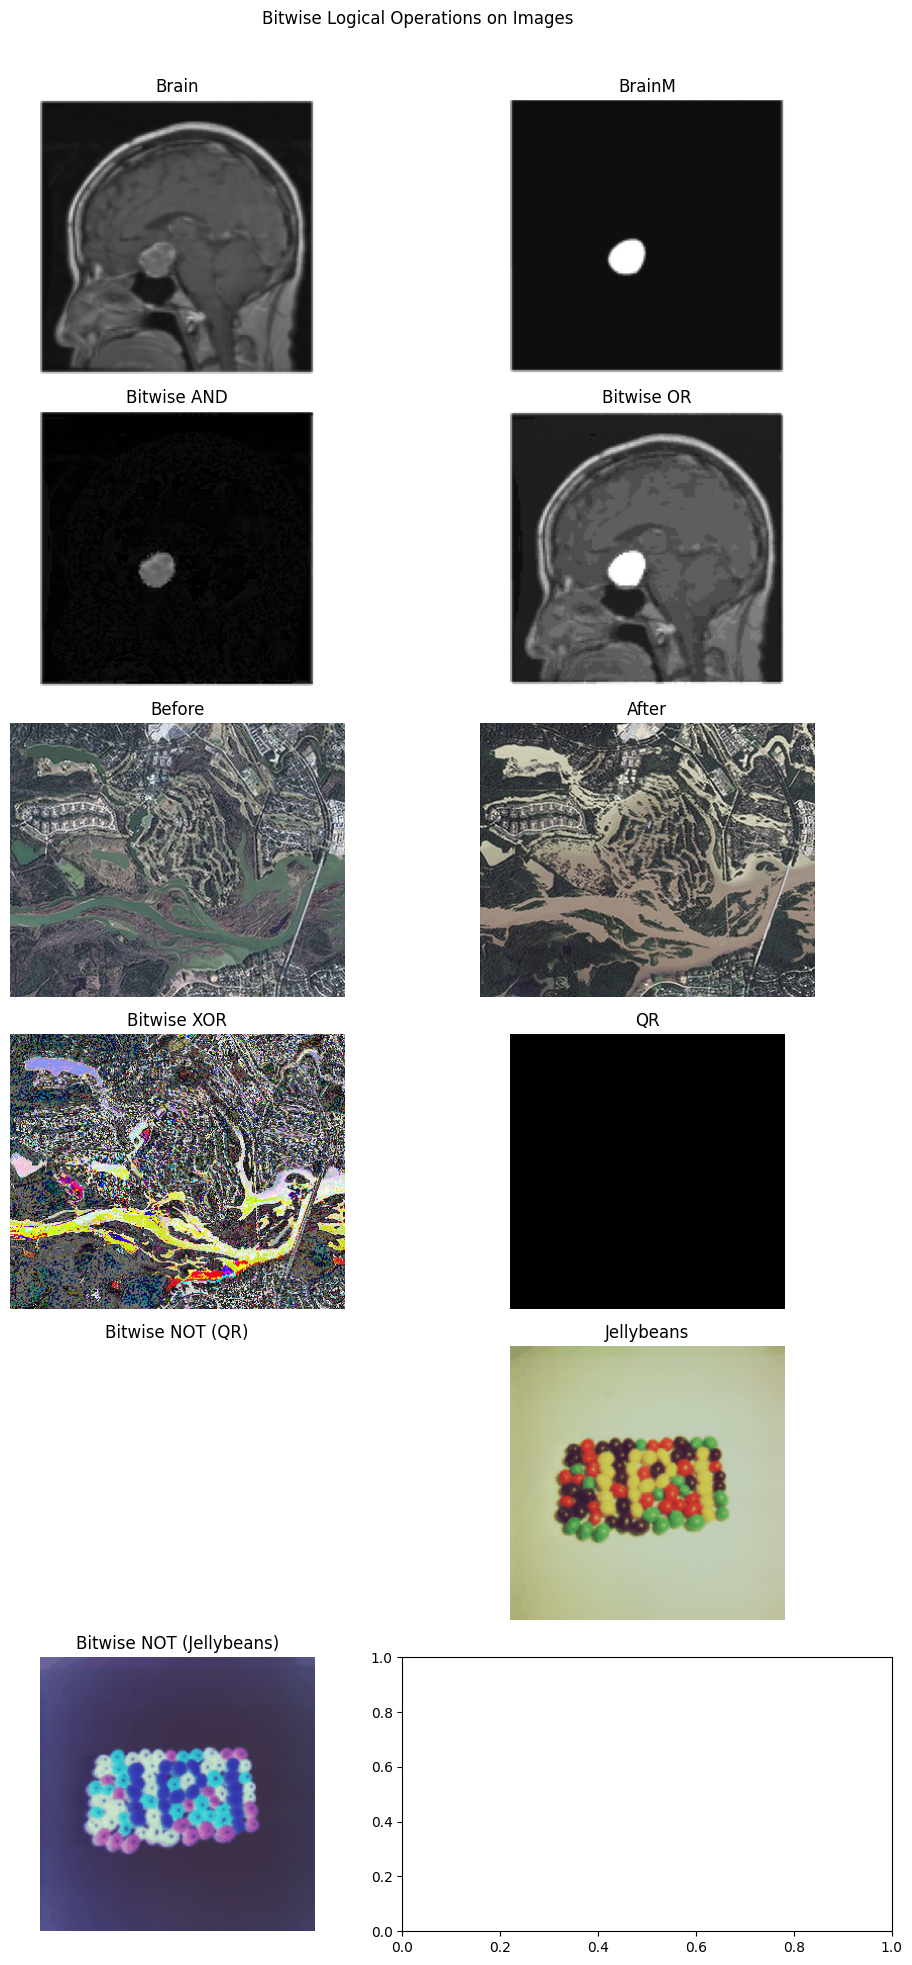

In [23]:
# Apply bitwise logical operations on the given image pairs using OpenCV.

import cv2
import matplotlib.pyplot as plt

# Load the images
brain = cv2.imread('Images/Brain.png')
brain_m = cv2.imread('Images/BrainM.png')
before = cv2.imread('Images/Before.png')
after = cv2.imread('Images/After.png')
qr = cv2.imread('Images/QR.png')
jellybeans = cv2.imread('Images/Jellybeans.png')

# Apply bitwise operations
bitwise_and_result = cv2.bitwise_and(brain, brain_m)
bitwise_or_result = cv2.bitwise_or(brain, brain_m)
bitwise_xor_result = cv2.bitwise_xor(before, after)
bitwise_not_qr = cv2.bitwise_not(qr)
bitwise_not_jellybeans = cv2.bitwise_not(jellybeans)

# Create list of images with titles
images = [
    (brain, "Brain"),
    (brain_m, "BrainM"),
    (bitwise_and_result, "Bitwise AND"),
    (bitwise_or_result, "Bitwise OR"),
    (before, "Before"),
    (after, "After"),
    (bitwise_xor_result, "Bitwise XOR"),
    (qr, "QR"),
    (bitwise_not_qr, "Bitwise NOT (QR)"),
    (jellybeans, "Jellybeans"),
    (bitwise_not_jellybeans, "Bitwise NOT (Jellybeans)")
]

# Adjust subplot grid size (6 rows, 2 columns)
fig, axes = plt.subplots(6, 2, figsize=(10, 20))
fig.suptitle("Bitwise Logical Operations on Images")

# Loop through images and display
for ax, (img, title) in zip(axes.ravel(), images):
    if img is not None:  # Ensure image is loaded
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Prevent title overlap
plt.show()



***Add your analysis and comments here***  

# Bitwise Logical Operations on Images

## 1. Bitwise AND (`cv2.bitwise_and`)
- **Images**: Brain.png and BrainM.png
- **Effect**: The resulting image displays only the overlapping features of the two brain images. Areas where both images have non-zero pixel values are highlighted, effectively isolating shared structures.

## 2. Bitwise OR (`cv2.bitwise_or`)
- **Images**: Brain.png and BrainM.png
- **Effect**: The output combines features from both images, showcasing all regions that are present in either image. This enhances the visibility of structures that may not be present in one of the original images.

## 3. Bitwise XOR (`cv2.bitwise_xor`)
- **Images**: Before.png and After.png
- **Effect**: The resulting image highlights the differences between the two images. Areas that are common to both will appear black, while those that differ will be highlighted, making it easy to identify changes.

## 4. Bitwise NOT (`cv2.bitwise_not`)
- **Images**: QR.png and Jellybeans.png
- **Effect**: 
  - For **QR.png**, the output will be a negative image, where dark areas become light and vice versa. This can help in visualizing the QR code differently.
  - For **Jellybeans.png**, the inversion creates a stark contrast in colors, emphasizing the shape and arrangement of the jellybeans in a unique way.

  ## Summary of Results
- **Bitwise AND**: Isolates overlapping features in the brain images.
- **Bitwise OR**: Combines features from both brain images, enhancing visibility.
- **Bitwise XOR**: Effectively highlights differences between the before and after images.
- **Bitwise NOT**: Produces negative images, useful for visualization and feature enhancement.